# Finding the Best Markets to Advertise in

## Executive Summary

In this project, we are going to fing the best two markets to advertise an online programming learning platform. 

With the data collected by the survey, we have choose the appropriate columns and samples for the analysis. The main steps of the analysis is data exploration, data cleaning and data analysis.

Finally, we draw the conclusion that USA and India will be the best two markets.

## Introduction

There is an e-learning company that offers courses on programming. Most of the courses are on web and mobile development, but the company also covers many other domains, like data science, game development, etc. 

The company wants to promote its product and would like to invest some money in advertisement. 

The goal of the project is to find out the two best markets to advertise in. 

The sample data that will be used in this project is the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). 

## Data Exploration

### Import the data

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory = 0)
data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Get the shape of the data
data.shape

(18175, 136)

In [7]:
# Get the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [8]:
# Get the summary statistics of the data
data.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,...,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,26.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,32.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,90.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


The dataset has 18175 rows and 136 columns in total. The data is a mix of float and object. The data variables we can see are nominal, ordinal, interval, and ratio types. From the above table, we can see that the sample counts of variables are different, with a wide range from 100 to almost 20000. Therefore, we will pick up columns with more than 5000 not-null values.

In [9]:
# Show columns with more than 5000 not-null values
for col in data.columns:
    if data[col].notna().sum() >= 5000:
        print(col, data[col].notna().sum())

Age 15367
AttendedBootcamp 17709
CityPopulation 15354
CommuteTime 9246
CountryCitizen 15382
CountryLive 15336
EmploymentField 8116
EmploymentStatus 14345
ExpectedEarning 7200
Gender 15454
HasDebt 15291
HasFinancialDependents 15329
HasHighSpdInternet 15380
HasHomeMortgage 6397
HasServedInMilitary 15256
HasStudentDebt 6402
HoursLearning 16714
ID.x 18175
ID.y 15743
Income 7623
IsEthnicMinority 15293
IsReceiveDisabilitiesBenefits 15222
IsSoftwareDev 18068
IsUnderEmployed 9223
JobApplyWhen 8138
JobPref 13483
JobRelocateYesNo 6503
JobRoleInterest 6992
JobWherePref 8118
LanguageAtHome 15344
MaritalStatus 15335
MoneyForLearning 16577
MonthsProgramming 17084
NetworkID 18175
Part1EndTime 18175
Part1StartTime 18175
Part2EndTime 15743
Part2StartTime 15743
ResourceCodecademy 9390
ResourceFCC 13803
ResourceMDN 6417
ResourceSO 11207
ResourceUdemy 5120
ResourceW3S 9765
SchoolDegree 15368
SchoolMajor 8727
YouTubeFCC 6036


## Data Cleanup

### Indentify the relevant columns of the analysis

In this part, we will only choose columns from the above output for further analysis. As our final goal is to choose a market to advertise in, we have to choose two markets with the biggest advantages, such as high comsumption of e-learning courses, wide support of programming-related jobs and so on.

Therefore, the following columns will be used:

1. `ID.x` : the unique number to identify a user

2. `CountryLive`: the country where a user lives in

3. `MoneyForLearning`: how much money a user has been spent on e-learning

4. `MonthsProgramming`: how long a user has learnt programming

5. `JobRoleInterest`: the job a user interested in 

In [11]:
relevant_data = data[['ID.x',
                     'CountryLive',
                     'MoneyForLearning',
                     'MonthsProgramming',
                     'JobRoleInterest']].copy()
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID.x               18175 non-null  object 
 1   CountryLive        15336 non-null  object 
 2   MoneyForLearning   16577 non-null  float64
 3   MonthsProgramming  17084 non-null  float64
 4   JobRoleInterest    6992 non-null   object 
dtypes: float64(2), object(3)
memory usage: 710.1+ KB


In [12]:
# Drop rows without a JobRoleInterest
relevant_data = relevant_data[relevant_data['JobRoleInterest'].notnull()]
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6992 entries, 1 to 18174
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID.x               6992 non-null   object 
 1   CountryLive        6838 non-null   object 
 2   MoneyForLearning   6476 non-null   float64
 3   MonthsProgramming  6633 non-null   float64
 4   JobRoleInterest    6992 non-null   object 
dtypes: float64(2), object(3)
memory usage: 327.8+ KB


In [13]:
# Drop other null values
relevant_data.dropna(axis = 0, inplace = True)
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6212 entries, 1 to 18171
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID.x               6212 non-null   object 
 1   CountryLive        6212 non-null   object 
 2   MoneyForLearning   6212 non-null   float64
 3   MonthsProgramming  6212 non-null   float64
 4   JobRoleInterest    6212 non-null   object 
dtypes: float64(2), object(3)
memory usage: 291.2+ KB


Finally, we will use these 5 columns and 6212 rows for the analysis.

In [71]:
relevant_data.head()

,ID.x,CountryLive,MoneyForLearning,MonthsProgramming,JobRoleInterest
1,5bfef9ecb211ec4f518cfc1d2a6f3e0c,United States of America,80.0,6.0,Full-Stack Web Developer
2,14f1863afa9c7de488050b82eb3edd96,United States of America,1000.0,5.0,"Front-End Web Developer, Back-End Web Develo..."
3,91756eb4dc280062a541c25a3d44cfb0,Brazil,0.0,5.0,"Front-End Web Developer, Full-Stack Web Deve..."
4,aa3f061a1949a90b27bef7411ecd193f,Portugal,0.0,24.0,"Full-Stack Web Developer, Information Security..."
6,5e130f133306abd6c2f9af31467ff37c,United Kingdom,0.0,12.0,Full-Stack Web Developer


We can find that the column `JobRoleInterest` has several different tags in one row, so we need to split them later.

### Process the `JobRoleInterest` column

In [72]:
jobs = relevant_data['JobRoleInterest'].str.split(',', expand = True).copy()
split_jobtags = pd.concat([relevant_data, jobs], axis = 1)

split_jobtags.head()

,ID.x,CountryLive,MoneyForLearning,MonthsProgramming,JobRoleInterest,0,1,2,3,4,5,6,7,8,9,10,11,12
1,5bfef9ecb211ec4f518cfc1d2a6f3e0c,United States of America,80.0,6.0,Full-Stack Web Developer,Full-Stack Web Developer,None,None,None,None,None,None,None,None,None,None,None,None
2,14f1863afa9c7de488050b82eb3edd96,United States of America,1000.0,5.0,"Front-End Web Developer, Back-End Web Develo...",Front-End Web Developer,Back-End Web Developer,DevOps / SysAdmin,Mobile Developer,Full-Stack Web Developer,None,None,None,None,None,None,None,None
3,91756eb4dc280062a541c25a3d44cfb0,Brazil,0.0,5.0,"Front-End Web Developer, Full-Stack Web Deve...",Front-End Web Developer,Full-Stack Web Developer,Back-End Web Developer,None,None,None,None,None,None,None,None,None,None
4,aa3f061a1949a90b27bef7411ecd193f,Portugal,0.0,24.0,"Full-Stack Web Developer, Information Security...",Full-Stack Web Developer,Information Security,Mobile Developer,Front-End Web Developer,Back-End Web Developer,None,None,None,None,None,None,None,None
6,5e130f133306abd6c2f9af31467ff37c,United Kingdom,0.0,12.0,Full-Stack Web Developer,Full-Stack Web Developer,None,None,None,None,None,None,None,None,None,None,None,None


In [73]:
# Change the above dataset to long format
melted_df = split_jobtags.melt(id_vars = ['ID.x',
                                         'CountryLive',
                                         'MoneyForLearning',
                                         'MonthsProgramming'],
                              value_vars = [0,1,2,3,4,5,6,7,8,9,10,11,12])

# Delete the rows with null value
melted_df = melted_df[melted_df['value'].notnull()]

# Delete the whitespaces in job tags
melted_df['value'] = melted_df['value'].str.strip()

# Rename the final dataset
melted_df.rename(columns = {'ID.x': 'ID',
                            'CountryLive': 'Country',
                            'MoneyForLearning': 'Money_for_learning',
                            'MonthsProgramming': 'Months_programming',
                            'variable': "Mention_cnt",
                            "value": 'Role_interest'}, inplace = True)
melted_df.sort_values('ID')

,ID,Country,Money_for_learning,Months_programming,Mention_cnt,Role_interest
3335,000264c6167d33a58f6c086ec85eb1c5,India,0.0,2.0,0,Front-End Web Developer
2755,000aa0d525d96449ed2bb198621cd19b,Philippines,0.0,4.0,0,Full-Stack Web Developer
5454,0015a96306bf3541b8c84999447b7eb7,United States of America,100.0,1.0,0,Full-Stack Web Developer
18187,001e01f9f0c5c259ec2dcde5f706e9eb,United States of America,200.0,5.0,2,Full-Stack Web Developer
5763,001e01f9f0c5c259ec2dcde5f706e9eb,United States of America,200.0,5.0,0,User Experience Designer
...,...,...,...,...,...,...
21446,fff57c57c3e9e9762f5410204dfa8281,Canada,400.0,6.0,3,Game Developer
13015,fffba79ffe1aacf3aaa4d55cd42c826e,India,0.0,8.0,2,Data Engineer
19227,fffba79ffe1aacf3aaa4d55cd42c826e,India,0.0,8.0,3,Data Scientist
6803,fffba79ffe1aacf3aaa4d55cd42c826e,India,0.0,8.0,1,Full-Stack Web Developer


Now, we want to know the amount of unique `Role_interest`.

In [74]:
melted_df['Role_interest'].value_counts().sort_values(ascending = False).head(20)

Full-Stack Web Developer         3783
Front-End Web Developer          3151
Back-End Web Developer           2496
Mobile Developer                 2031
Data Scientist                   1460
Game Developer                   1441
User Experience Designer         1306
Information Security             1165
Data Engineer                    1108
DevOps / SysAdmin                 838
Product Manager                   718
Quality Assurance Engineer        433
Software Engineer                   9
Software Developer                  6
Artificial Intelligence             4
Software engineer                   4
Desktop Application Developer       3
Machine Learning Engineer           2
Unsure                              2
Programmer                          2
Name: Role_interest, dtype: int64

We will group `Role_interest` with fewer than 10 mentions as 'Others'.

In [75]:
# Create a list to hold the first 12 `Role_interest`
job_ls = melted_df['Role_interest'].value_counts().sort_values(ascending = False).head(12)
job_ls = list(job_ls.index)

# Group other `Role_interest` as 'Others'
melted_df['Role_interest'] = melted_df['Role_interest'].apply(lambda x: x if x in job_ls else 'Others')
melted_df['Role_interest'].value_counts().sort_values(ascending = False)

Full-Stack Web Developer      3783
Front-End Web Developer       3151
Back-End Web Developer        2496
Mobile Developer              2031
Data Scientist                1460
Game Developer                1441
User Experience Designer      1306
Information Security          1165
Data Engineer                 1108
DevOps / SysAdmin              838
Product Manager                718
Quality Assurance Engineer     433
Others                         213
Name: Role_interest, dtype: int64

## Data Analysis

### Analyze `Role_interest`

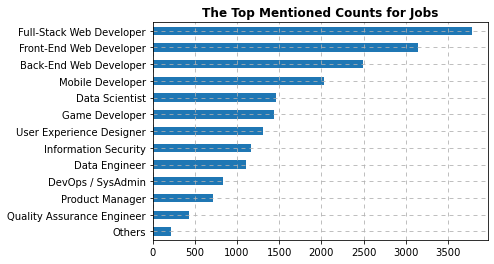

In [131]:
melted_df['Role_interest'].value_counts().sort_values().plot.barh()
plt.title(label = 'The Top Mentioned Counts for Jobs', fontsize = 12, weight = 'bold')
plt.grid(dashes = [5,5])
plt.show()

Web developer, mobile developer and data scientist are top three interested jobs. Courses related to these three roles are sold the most.

### Analyze `Country`

As there may be repeated records for a person in melted_df, we will use relevant_data for analyzing Country.

In [118]:
# Show the top 20 countries
relevant_data['CountryLive'].value_counts().sort_values(ascending = False).head(20)

United States of America         2933
India                             463
United Kingdom                    279
Canada                            240
Poland                            122
Germany                           114
Brazil                            111
Australia                         102
Ukraine                            79
Russia                             79
Nigeria                            72
Spain                              66
Romania                            65
France                             62
Netherlands (Holland, Europe)      59
Italy                              52
Serbia                             44
Philippines                        43
Ireland                            41
Greece                             40
Name: CountryLive, dtype: int64

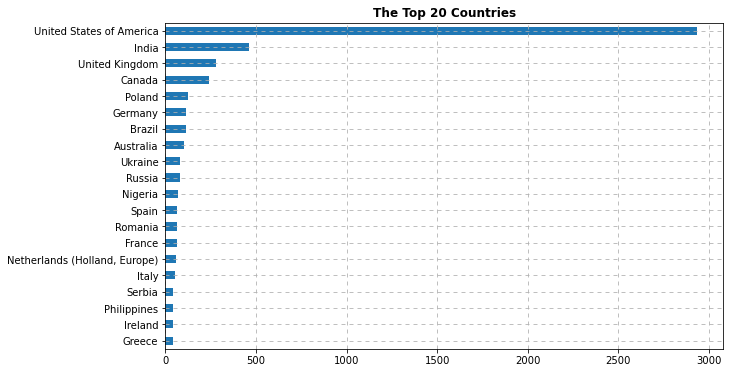

In [132]:
# Visualization
plt.figure(figsize = (10,6))
relevant_data['CountryLive'].value_counts().sort_values().tail(20).plot.barh()
plt.title(label = 'The Top 20 Countries', fontsize = 12, weight = 'bold')
plt.grid(dashes = (5,5))
plt.show()

**United States of America, India, United Kingdom and Canada are the top four countries in the dataset.** We will continue to include money and time spent on e-learning programming to draw the final conculsion. The main reasons are:

1. These countries have the most amount of e-learnes in the world. They have stood out regardless of time and money, as their scales are pretty large.

2. These countries speaks and writes in English, which means that we don not need to do more transalation work if we put more resources into these four markets.

In [152]:
countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
relevant_df_fourcountries = relevant_data[relevant_data['CountryLive'].isin(countries)]
relevant_df_fourcountries.sort_values('CountryLive')

,ID.x,CountryLive,MoneyForLearning,MonthsProgramming,JobRoleInterest
2423,47dc23a32ce90e01a88cefe31be58358,Canada,30.0,12.0,"Data Scientist, Quality Assurance Engineer..."
12012,8d0b54c2e69c73c1beb589f4d82061b6,Canada,0.0,12.0,"User Experience Designer, Data Engineer, F..."
5474,c18004116dd0f71d3bbb3120d3aa3809,Canada,100.0,12.0,"Front-End Web Developer, Full-Stack Web Deve..."
12044,e4228a9638de16cbdd2cd02ef78e71cb,Canada,0.0,4.0,"Information Security, DevOps / SysAdmin, Bac..."
12055,8b44e4b301e3c9a6789397c4fb9238c1,Canada,60.0,15.0,Systems Programming
...,...,...,...,...,...
1358,aab4253a8a5c9812408448f0f5b2e190,United States of America,2500.0,5.0,"Front-End Web Developer, Full-Stack Web Deve..."
7099,87edd7a52edb5443331e3b8126924bac,United States of America,1000.0,4.0,"Front-End Web Developer, Full-Stack Web Deve..."
7103,5577549dc5f6447429568b030bb6f50b,United States of America,0.0,15.0,"User Experience Designer, Information Securi..."
7079,e7fadd023f71d7c769d0b7a669bb02a2,United States of America,0.0,1.0,"Front-End Web Developer, User Experience D..."


### Analyze `MonthsProgramming` and  `MoneyForLearning`

In [144]:
stat_sum = relevant_df_fourcountries.groupby(['CountryLive']).sum().sort_values('MoneyForLearning', ascending = False)
stat_sum

,MoneyForLearning,MonthsProgramming
CountryLive,,
United States of America,3703227.0,40819.0
India,364997.0,6596.0
Canada,199528.0,2848.0
United Kingdom,91405.0,3453.0


In [145]:
# Calculate the average money for learning per month
stat_sum['Money_per_month'] = stat_sum['MoneyForLearning'] / stat_sum['MonthsProgramming']
stat_sum

,MoneyForLearning,MonthsProgramming,Money_per_month
CountryLive,,,
United States of America,3703227.0,40819.0,90.723119
India,364997.0,6596.0,55.336113
Canada,199528.0,2848.0,70.058989
United Kingdom,91405.0,3453.0,26.471184


As the monthly subscription of the e-learning resources is 59 dollars. The above table shows that learners from USA and Canada in general have an average monthly costs more than 59 dollars.

However, the above analysis did not consider the conditions that there are many 0 values in these two columns. Therefore, we will deal with these values for a more accurate result.

### Drop 0 value in `MonthsProgramming`

As the column `MonthsProgramming` is used as the denominator, we will drop 0 value.

In [147]:
# Count the number of 0 values
print((relevant_df_fourcountries['MoneyForLearning'] == 0).sum())
print((relevant_df_fourcountries['MonthsProgramming'] == 0).sum())

1844
146


In [154]:
# Drop and create a new column to record `Cost_per_month`
relevant_df_fourcountries = relevant_df_fourcountries[relevant_df_fourcountries['MonthsProgramming'] != 0]
relevant_df_fourcountries['Cost_per_month'] = relevant_df_fourcountries['MoneyForLearning'] / relevant_df_fourcountries['MonthsProgramming']
relevant_df_fourcountries.head()

,ID.x,CountryLive,MoneyForLearning,MonthsProgramming,JobRoleInterest,Cost_per_month
1,5bfef9ecb211ec4f518cfc1d2a6f3e0c,United States of America,80.0,6.0,Full-Stack Web Developer,13.333333
2,14f1863afa9c7de488050b82eb3edd96,United States of America,1000.0,5.0,"Front-End Web Developer, Back-End Web Develo...",200.000000
6,5e130f133306abd6c2f9af31467ff37c,United Kingdom,0.0,12.0,Full-Stack Web Developer,0.000000
15,cfff58e11d5ab123bd574302ff1b8e8f,United States of America,0.0,1.0,Full-Stack Web Developer,0.000000
16,91ec37259e33b1549af3506011142f4a,United States of America,200.0,12.0,Full-Stack Web Developer,16.666667


In [155]:
relevant_df_fourcountries.groupby('CountryLive')['Cost_per_month'].describe()

,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
Canada,235.0,107.415450,427.998882,0.0,0.0,0.000000,25.000000,5000.0
India,454.0,136.347477,699.412909,0.0,0.0,0.000000,12.875000,10000.0
United Kingdom,270.0,46.904110,164.811738,0.0,0.0,0.150000,20.833333,1400.0
United States of America,2810.0,232.771574,1974.260414,0.0,0.0,4.166667,50.000000,80000.0


### Manage outliers

As customers have many other resources to learn programming, like universities or bootcamps, we have to manage outliers to find our targeted customers more accurately.

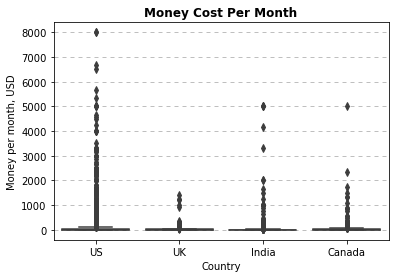

In [172]:
sns.boxplot(x = 'CountryLive',y = 'Cost_per_month', 
            data = relevant_df_fourcountries[relevant_df_fourcountries['Cost_per_month']<10000])
plt.title('Money Cost Per Month',fontsize = 12, weight = 'bold')
plt.ylabel('Money per month, USD')
plt.xlabel('Country')
plt.grid(axis = 'y', dashes = [5,5])
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

We will set our customers as who costs on learning programming in a range of 20 and 500 US dollars.

In [186]:
# Set the targeted customers
target_cust = (relevant_df_fourcountries['Cost_per_month'] > 20) & (relevant_df_fourcountries['Cost_per_month'] < 200)
print(relevant_df_fourcountries.shape[0])
print(relevant_df_fourcountries[target_cust].shape[0])

3769
763


Under the condition, the number of respondents in each country is:

In [187]:
num_respondents = relevant_df_fourcountries[target_cust]['CountryLive'].value_counts()
num_respondents

United States of America    609
India                        60
United Kingdom               54
Canada                       40
Name: CountryLive, dtype: int64

In [188]:
# Calculate the average costs per month of each country
medians = relevant_df_fourcountries[target_cust].groupby('CountryLive')['Cost_per_month'].median()
means = relevant_df_fourcountries[target_cust].groupby('CountryLive')['Cost_per_month'].mean()
results_df = pd.DataFrame(data = {'Median': medians,
                                  'Mean': means,
                                  'Num_respondents': num_respondents})
results_df


,Median,Mean,Num_respondents
Canada,45.833333,58.502976,40
India,79.916667,89.403674,60
United Kingdom,60.000000,69.667408,54
United States of America,50.000000,68.784975,609


### Visualize

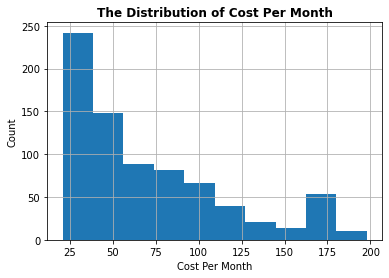

In [189]:
relevant_df_fourcountries[target_cust]['Cost_per_month'].hist()
plt.title(label = 'The Distribution of Cost Per Month', fontsize = 12, weight = 'bold')
plt.xlabel('Cost Per Month')
plt.ylabel('Count')
plt.show()

It is an obvious right-skewed distribution. We will see the situation of each country in a box plot.

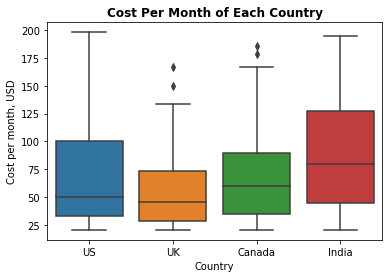

In [191]:
sns.boxplot(x = 'CountryLive',
            y = 'Cost_per_month', 
            data = relevant_df_fourcountries[target_cust])
plt.title('Cost Per Month of Each Country',fontsize = 12, weight = 'bold')
plt.ylabel('Cost per month, USD')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'Canada', 'India'])
plt.show()

## Conclusion

Based on the previous analysis, we will finally choose **USA and India** as the targeted markets.

The main reasons are:

1. USA holds the largest amounts of customers in the world. 
2. India has the largest monthly costs among four countries we select. Meanwhile, India is a country with a strong IT and programming atmosphere. So it will be a good market.